# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable

api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q= "bitcoin", language="en")


In [6]:
# Fetch the Ethereum news articles
etherium_news = newsapi.get_everything(
    q="etherium",
    language="en"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame

#Initialize the Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

#Create a list for bitcoin sentiment to hold the sentiment scores
bitcoin_sentiment= []

#Iterate over the bitcoin articles using a for loop and the analyzer
for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]                                                                                                                                                                                             
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu })
    except AttributeError:
        pass

#Convert to DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiment)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]
bitcoin_sentiment_df

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
5,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807
6,2022-05-06,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557
7,2022-04-26,April 26 (Reuters) - Bitcoin dropped 5.1% to $...,-0.2732,0.000,0.063,0.937
8,2022-05-04,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.063,0.937
9,2022-05-10,Posted \r\nFrom Bitcoin's dramatic drop to a n...,-0.3612,0.000,0.123,0.877


In [8]:
# Create the Ethereum sentiment scores DataFrame

#repeat the same steps for etherium
etherium_sentiment= []

#Iterate over the etherium articles using a for loop and the analyzer
for article in etherium_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]                                                                                                                                                                                             
        neg = sentiment["neg"]
        
        etherium_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu })
    except AttributeError:
        pass
    
#Convert to DataFrame and reorder the columns
etherium_sentiment_df = pd.DataFrame(etherium_sentiment)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ehterium_sentiment_df = etherium_sentiment_df[cols]



In [9]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.024585,0.070000,0.060600,0.869400
std,0.407708,0.067763,0.061405,0.093083
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.000000,0.844250
50%,0.012800,0.064000,0.063000,0.894000
75%,0.355075,0.085750,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [10]:
# Describe the Ethereum Sentiment
etherium_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.260800,0.105750,0.031550,0.862700
std,0.480821,0.092894,0.055859,0.085886
min,-0.770700,0.000000,0.000000,0.694000
25%,-0.048075,0.000000,0.000000,0.812000
50%,0.305600,0.092500,0.000000,0.847500
75%,0.735100,0.173250,0.052000,0.933000
max,0.913600,0.306000,0.204000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium had the highest mean positive score at .114

Q: Which coin had the highest compound score?

A: Etherium had the highest compound score at .913

Q. Which coin had the highest positive score?

A: Etherium had the highest positive score at .306

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [57]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'/prnewswire/', '--', "'s"}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
nltk.download('wordnet')
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a tokenized list of the words
    list_token = word_tokenize(text)
    # Remove the punctuation from text
    list_token = list(filter(lambda w: w not in punctuation, list_token))
   
    #Removing stopwords
    list_token = list(filter(lambda w: w.lower() not in sw, list_token))
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in list_token]
   
    # Convert the words to lowercase and remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
    return tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df["tokens"]= bitcoin_sentiment_df.text.apply(tokenizer)

bitcoin_sentiment_df


,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, images, value, bitcoin,..."
5,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegas-s..."
6,2022-05-06,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557,"[cryptocurrency, mixer, sometimes, used, help,..."
7,2022-04-26,April 26 (Reuters) - Bitcoin dropped 5.1% to $...,-0.2732,0.000,0.063,0.937,"[april, 26, reuters, bitcoin, dropped, 5.1, 38..."
8,2022-05-04,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.063,0.937,"[may, 4, reuters, bitcoin, rose, 5.7, 39,862.8..."
9,2022-05-10,Posted \r\nFrom Bitcoin's dramatic drop to a n...,-0.3612,0.000,0.123,0.877,"[posted, bitcoin, dramatic, drop, new, way, pa..."


In [60]:
# Create a new tokens column for Ethereum
etherium_sentiment_df["tokens"]= etherium_sentiment_df.text.apply(tokenizer)

etherium_sentiment_df

,text,date,compound,positive,negative,neutral,tokens
0,"Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, ``, crypto, brows..."
1,"Anne-Christine Polet, founder at Hatch and Sti...",2022-04-29,-0.0762,0.000,0.036,0.964,"[anne-christine, polet, founder, hatch, stitch..."
2,"Look what you've done you naughty, reckless ap...",2022-05-05,-0.7707,0.000,0.204,0.796,"[look, 've, done, naughty, reckless, ape, 've,..."
3,1 2022/04/14() 10:47:24 ID:FbO8jQT99.net\r\nht...,2022-04-14,0.0000,0.000,0.000,1.000,"[1, 2022/04/14, 10:47:24, id, fbo8jqt99.net, h..."
4,Compared to the amount of money that cryptocur...,2022-05-09,0.0772,0.090,0.058,0.852,"[compared, amount, money, cryptocurrency, mark..."
5,It was not uncommon to see GPUs sell for hundr...,2022-05-05,-0.2500,0.000,0.050,0.950,"[uncommon, see, gpus, sell, hundred, dollar, s..."
6,Crypto staking is a great way of generating pa...,2022-04-21,0.9136,0.306,0.000,0.694,"[crypto, staking, great, way, generating, pass..."
7,"As of Thursday, the entire cryptocurrency sect...",2022-05-13,-0.4019,0.095,0.142,0.763,"[thursday, entire, cryptocurrency, sector, plu..."
8,"Since 2019, the temperature in Argentina’s cry...",2022-05-03,0.5106,0.137,0.000,0.863,"[since, 2019, temperature, argentina, ’, crypt..."
9,Richard Garriott is one of the most influentia...,2022-04-15,0.8051,0.180,0.000,0.820,"[richard, garriott, one, influential, successf..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [61]:
from collections import Counter
from nltk import ngrams

In [62]:
# Generate the Bitcoin N-grams where N=2

bitcoin_ngrams= ngrams(tokenizer(bitcoin_sentiment_df.text.str.cat()), n=2)

In [63]:
# Generate the Ethereum N-grams where N=2

etherium_ngrams= ngrams(tokenizer(etherium_sentiment_df.text.str.cat()), n=2)

In [64]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [65]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_ngrams, 10)

[(('reuters', 'bitcoin'), 5),
 (('previous', 'close'), 4),
 (('close', 'bitcoin'), 4),
 (('bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'may'), 3),
 (('getty', 'images'), 2),
 (('last', 'week'), 2)]

In [66]:
# Use token_count to get the top 10 words for Ethereum
token_count(etherium_ngrams, 10)

[(('opera', 'launched'), 2),
 (('launched', 'dedicated'), 2),
 (('dedicated', '``'), 2),
 (('``', 'crypto'), 2),
 (('crypto', 'browser'), 2),
 (('browser', "''"), 2),
 (("''", 'beta'), 2),
 (('beta', 'back'), 2),
 (('back', 'january'), 2),
 (('january', 'promising'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

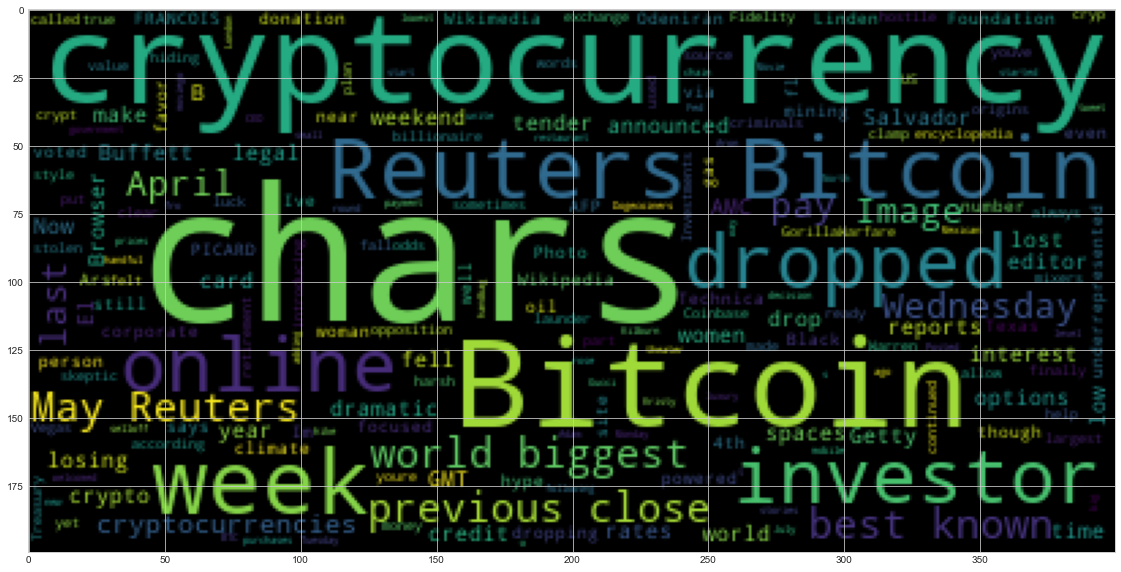

In [79]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_sentiment_df.text.str.cat())
plt.imshow(wc)

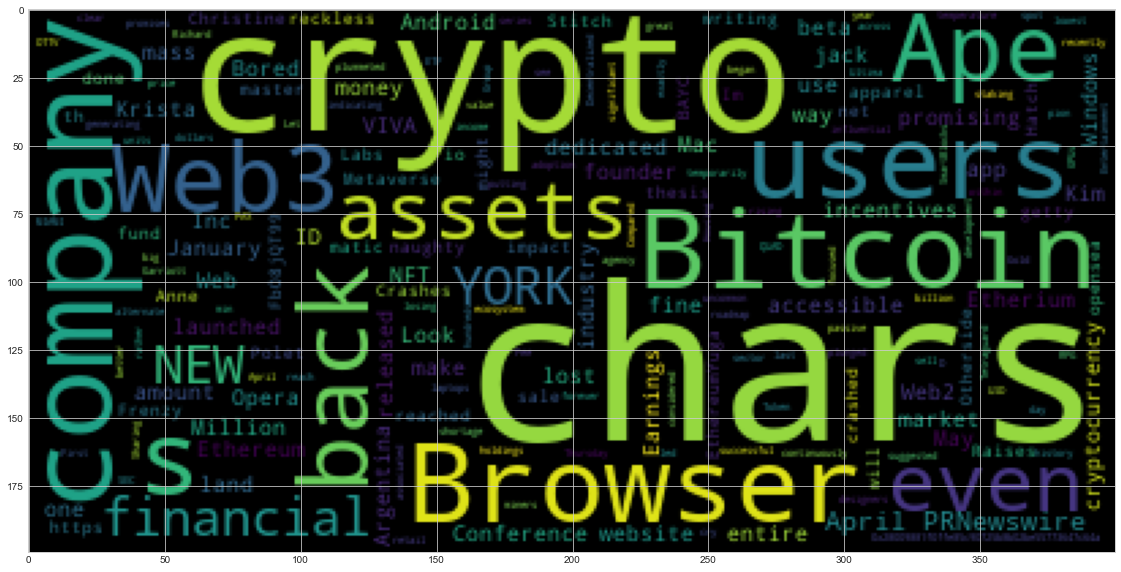

In [80]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(etherium_sentiment_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [81]:
import spacy
from spacy import displacy

In [82]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

2022-05-16 13:50:45.385664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-16 13:50:45.385780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [83]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [85]:
# Concatenate all of the Bitcoin text together
bitcoin_con = bitcoin_sentiment_df.text.str.cat()

In [90]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_con)

# Add a title to the document
bitcoin_doc.user_data["title"]= "Bitcoin and its NER"


In [91]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [92]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents if ent])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', "the Wikimedia Foundation's", 'Ars Technica', 'GorillaWarfare', 'Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'Last week', 'Fidelity Investments', 'the US Treasury', 'chars]April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '+339 chars]May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'last July', '33,000', 'the week', 'last week', 'Fed', '9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', '10', 'Reuters', 'chars]The Central African Republic', 'second', 'El Salvador', 'Wednesda

---

### Ethereum NER

In [95]:
# Concatenate all of the Ethereum text together
etherium_con = etherium_sentiment_df.text.str.cat()

In [96]:
# Run the NER processor on all of the text
etherium_doc = nlp(etherium_con)
# Add a title to the document
etherium_doc.user_data["title"]= "Etherium and its NER"

In [97]:
# Render the visualization
displacy.render(etherium_doc, style='ent')

In [98]:
# List all Entities
print([ent.text for ent in etherium_doc.ents if ent])

['Opera', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Christine Polet', 'Hatch and Stitch', '2.0', 'Etherium', 'BAYC', 'Bored Ape Metaverse Frenzy', '$320 Million', 'EthereumYuga Labs', 'Otherside', 'ID', '99%', 'jack⚡️', 'April 7, 2022\r\n13 2022/04/14', 'ID', '$5.5 million', 'USD', 'SEC', 'hundreds of dollars', 'last year', 'Ethereum', 'Thursday', '$200 billion', 'a day', 'under $25,000', '2019', 'Argentina', 'Argentina', 'Garriott', 'RPG', 'Ultima', '1981', 'Housing Bitcoin, Etherium', 'PAX Gold + QUAD', 'MIAMI', 'April 27, 2022', 'SmartBlocks', 'chars]NEW YORK', 'April 14, 2022', 'VIVA Entertainment Group', 'OTTV', 'Company', 'VivaLive', 'fiat', 'Consent Management Service Uses Hedera Crypto Tech', 'HBAR Foundation', 'YORK', 'Pa.', 'April 28, 2022', 'PrivacyCheq', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Global, Inc.', 'NASDAQ', 'May 10, 2022', '5:30 PM', 'Anil Gupta - VP', 'Brian Armstrong - Co-Founder', 'chars]NEW YORK', 'a wild week', 'House', 'Image

---